Este trabalho visa analisar  para a empresa de telecomunicações Megaline. TA empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.
Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

##  IMPORTANDO E EXPLORANDO DADOS 

In [1]:
import pandas as pd 


In [2]:
import scipy.stats  as spt 

In [3]:
df_calls= pd.read_csv('/datasets/megaline_calls.csv')
df_internet= pd.read_csv('/datasets/megaline_internet.csv')
df_messages= pd.read_csv('/datasets/megaline_messages.csv')
df_plans= pd.read_csv('/datasets/megaline_plans.csv')
df_users= pd.read_csv('/datasets/megaline_users.csv')




In [4]:
df_geral = [[df_calls, df_internet, df_messages, df_plans,df_users  ]]

### Calls Dataset

In [5]:
df_calls.head(5)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
df_calls.describe()


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [8]:
df_calls.isnull().sum()


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [9]:
df_calls.duplicated().sum()

0

In [10]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['month']


0         12
1         12
2         12
3         12
4         12
          ..
137730    11
137731    10
137732     9
137733    10
137734    12
Name: month, Length: 137735, dtype: int64

In [11]:
df_calls['id_num']= df_calls['id'].astype(float)
df_calls['id']

0          1000_93
1         1000_145
2         1000_247
3         1000_309
4         1000_380
            ...   
137730    1499_199
137731    1499_200
137732    1499_201
137733    1499_202
137734    1499_203
Name: id, Length: 137735, dtype: object

In [12]:
df_calls['duration']= df_calls['duration'].round()  

<AxesSubplot:>

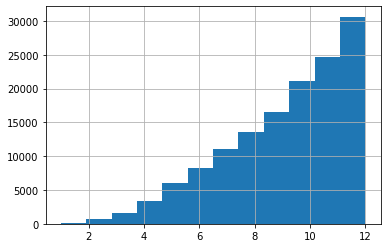

In [13]:
df_calls['month'].hist(bins=(12))

<AxesSubplot:>

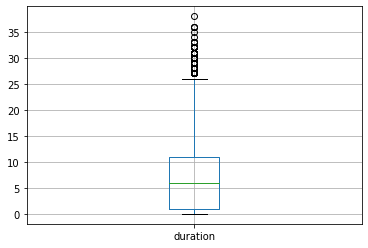

In [14]:
df_calls.boxplot(column='duration')

#### Observações sobre o dataset

 - A coluna com datas estão no formato Y-M-D, sendo assim se faaz necessário uma transformação para possibilitar uma analise do comportamento dos usuários por mês.
 - Transformação de algumas colunas para o type 'float'

#### Agrupando os dados por usuário

   - Para facilitar uma análise do comportamento dos usuários por mês, podemos utilizar a função pivot_table para agrupar as chamados por usuário/mês.
   - Esta estapa também pode ser repetida nos demais datasets.

In [15]:
calls_pivot = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum','count'])


In [16]:
calls_pivot.columns = ['minutes_used', 'calls_made']
calls_pivot.head()

minutes_used  calls_made
user_id month                          
1000    12            117.0          16
1001    8             173.0          27
        9             297.0          49
        10            374.0          65
        11            404.0          64

   ### Messages Dataset

In [17]:
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
df_messages.head(3)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


In [19]:
df_messages.isnull().sum()


id              0
user_id         0
message_date    0
dtype: int64

In [20]:
df_messages.duplicated().sum()

0

In [21]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month


In [22]:
messag_pivo= df_messages.pivot_table(index=['user_id','month' ], values='id', aggfunc='count')


In [23]:
 messag_pivo.columns= ['messages_made']

In [24]:
messag_pivo.head(3)

messages_made
user_id month               
1000    12                11
1001    8                 30
        9                 44

   ### Users Dataset

In [25]:
df_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [28]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [29]:
df_users.duplicated().sum()

0

In [30]:
df_users['month'] = pd.DatetimeIndex(df_users['reg_date']).month


In [31]:
user_pivo= df_users.pivot_table(index=['user_id' , 'plan', 'city' ],values='month', aggfunc='sum')
user_pivo

,,,month
user_id,plan,city,
1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12
1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8
1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",10
1003,surf,"Tulsa, OK MSA",1
1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",5
...,...,...,...
1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",9
1496,surf,"New Orleans-Metairie, LA MSA",2
1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",12


In [32]:
 user_pivo.columns= ['month']

#### Observações:

  - A coluna 'churn_date' tem quase 90% de valores NaN. porém esta coluna não traz dados de grande relevância para as analises

   ### Internet Dataset

In [33]:
df_internet.head(3)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


In [34]:
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
df_internet.describe()


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [36]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month


In [37]:
df_internet.isnull().sum()


id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

In [38]:
df_internet['gb_used']= df_internet['mb_used'] / 1024


In [39]:
data_use= df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='count')
data_use.columns=['internet_used_gb']

In [40]:
data_use

internet_used_gb
user_id month                  
1000    12                    5
1001    8                    25
        9                    53
        10                   56
        11                   51
...                         ...
1498    12                   65
1499    9                    45
        10                   61
        11                   49
        12                   65

[2277 rows x 1 columns]

In [41]:
df_internet['gb_used']

0         0.087754
1         0.000000
2         0.644922
3         0.264639
4         0.859590
            ...   
104820    0.212949
104821    0.297578
104822    0.285889
104823    0.000000
104824    0.740537
Name: gb_used, Length: 104825, dtype: float64

  -  Algumas modificações nos dados: 
        - mb_used convertido para Gb. 
        - Extração do Mês em session_date
      

   ### Plans Dataset

In [42]:
df_plans.head(3)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [43]:
plan_surf= df_plans.query('plan_name == "surf"')


In [44]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [45]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [46]:
df_plans.isnull().sum()


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [47]:
df_plans['GB']= df_plans['mb_per_month_included'] / 1024
df_plans['GB']

0    15.0
1    30.0
Name: GB, dtype: float64

### Aplicando merge para agrupar as tabelas

 - Como os dados estão em datasets separados, podemos usar a função .merge para facilitar as análises de comportamento amplo dos usuários. 

In [48]:
calls_pivot

minutes_used  calls_made
user_id month                          
1000    12            117.0          16
1001    8             173.0          27
        9             297.0          49
        10            374.0          65
        11            404.0          64
...                     ...         ...
1498    12            326.0          39
1499    9             328.0          41
        10            361.0          53
        11            287.0          45
        12            463.0          65

[2258 rows x 2 columns]

In [49]:
call_e_msgs= calls_pivot.merge(messag_pivo, on=['user_id', 'month'], how='outer')

In [50]:
usage_tabl=call_e_msgs.merge(data_use, on=['user_id', 'month'], how='outer') 
usage_tabl.head(5)

minutes_used  calls_made  messages_made  internet_used_gb
user_id month                                                           
1000    12            117.0        16.0           11.0               5.0
1001    8             173.0        27.0           30.0              25.0
        9             297.0        49.0           44.0              53.0
        10            374.0        65.0           53.0              56.0
        11            404.0        64.0           36.0              51.0

In [51]:
user_pivo

,,,month
user_id,plan,city,
1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12
1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8
1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",10
1003,surf,"Tulsa, OK MSA",1
1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",5
...,...,...,...
1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",9
1496,surf,"New Orleans-Metairie, LA MSA",2
1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",12


In [52]:
plano= df_users[['user_id', 'plan', 'city']]
plano

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [53]:
usage_tabl_planos=plano.merge(usage_tabl, on=['user_id'], how='outer') 


In [54]:
usage_tabl

minutes_used  calls_made  messages_made  internet_used_gb
user_id month                                                           
1000    12            117.0        16.0           11.0               5.0
1001    8             173.0        27.0           30.0              25.0
        9             297.0        49.0           44.0              53.0
        10            374.0        65.0           53.0              56.0
        11            404.0        64.0           36.0              51.0
...                     ...         ...            ...               ...
1349    12              NaN         NaN           61.0              27.0
1361    5               NaN         NaN            2.0               9.0
1482    10              NaN         NaN            2.0               NaN
1108    12              NaN         NaN            NaN               2.0
1311    6               NaN         NaN            NaN               9.0

[2293 rows x 4 columns]

In [55]:
usage_tabl_planos

,user_id,plan,city,minutes_used,calls_made,messages_made,internet_used_gb
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",117.0,16.0,11.0,5.0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",173.0,27.0,30.0,25.0
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",297.0,49.0,44.0,53.0
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",374.0,65.0,53.0,56.0
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",404.0,64.0,36.0,51.0
...,...,...,...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",326.0,39.0,NaN,65.0
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",328.0,41.0,NaN,45.0
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",361.0,53.0,NaN,61.0
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",287.0,45.0,NaN,49.0


### Cálculando month_revenue

#### Aplicando Funções para encontrar a receita mensal para cada usuário

   *Para obtermos uma receita mensal para cada usuário podemos utilizar uma função que acha o valor excedente de cada coluna (call, msg, txt), para então multiplicarmos pelos valores dos planos adicione o preço mensal.*  



##### Receita de calls

In [56]:
def chargeable_calls(row):
    plan = row['plan']
    minutes_used  = row['minutes_used']
    
    if plan == 'surf':
        if minutes_used > 500:
            chargeable = minutes_used - 500
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = minutes_used - 3000
        else:
            chargeable = 0
    return chargeable

In [57]:
user_pivo

,,,month
user_id,plan,city,
1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12
1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8
1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",10
1003,surf,"Tulsa, OK MSA",1
1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",5
...,...,...,...
1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",9
1496,surf,"New Orleans-Metairie, LA MSA",2
1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",12


In [58]:
usage_tabl_planos

,user_id,plan,city,minutes_used,calls_made,messages_made,internet_used_gb
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",117.0,16.0,11.0,5.0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",173.0,27.0,30.0,25.0
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",297.0,49.0,44.0,53.0
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",374.0,65.0,53.0,56.0
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",404.0,64.0,36.0,51.0
...,...,...,...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",326.0,39.0,NaN,65.0
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",328.0,41.0,NaN,45.0
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",361.0,53.0,NaN,61.0
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",287.0,45.0,NaN,49.0


In [59]:
usage_tabl_planos['charg_calls'] =  usage_tabl_planos.apply(chargeable_calls, axis=1)

In [60]:
usage_tabl_planos.head()

,user_id,plan,city,minutes_used,calls_made,messages_made,internet_used_gb,charg_calls
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",117.0,16.0,11.0,5.0,0.0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",173.0,27.0,30.0,25.0,0.0
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",297.0,49.0,44.0,53.0,0.0
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",374.0,65.0,53.0,56.0,0.0
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",404.0,64.0,36.0,51.0,0.0


In [61]:
receita_tot_calls= (usage_tabl_planos['charg_calls'] * 0.03 )+ 20 


In [62]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,GB
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


##### Receita de text

In [63]:
def chargeable_txt(row):
    plan = row['plan']
    messages_made = row['messages_made']
    
    if plan == 'surf':
        if messages_made > 50:
            chargeable = messages_made - 50
        else:
            chargeable = 0
    if plan == 'ultimate':
        if messages_made > 1000:
            chargeable = messages_made - 1000
        else:
            chargeable = 0
    return chargeable

In [64]:
usage_tabl_planos['charg_text'] =  usage_tabl_planos.apply(chargeable_txt, axis=1)

In [65]:
receita_tot_txt= (usage_tabl_planos['charg_text'] * 0.03 ) + 20 

In [66]:
usage_tabl_planos['charg_text'].describe()

count    2303.000000
mean        4.789839
std        16.417795
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       216.000000
Name: charg_text, dtype: float64

##### Receita de data


In [67]:
def chargeable_data(row):
    plan = row['plan']
    data_used = row['internet_used_gb']
    
    if plan == 'surf':
        if data_used > 1.5:
            chargeable = data_used - 1.5
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_used > 3:
            chargeable = data_used - 3
        else:
            chargeable = 0
    return chargeable

In [68]:
usage_tabl_planos['charg_data'] =  usage_tabl_planos.apply(chargeable_data, axis=1)

In [69]:
usage_tabl_planos.head(10)

,user_id,plan,city,minutes_used,calls_made,messages_made,internet_used_gb,charg_calls,charg_text,charg_data
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",117.0,16.0,11.0,5.0,0.0,0.0,2.0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",173.0,27.0,30.0,25.0,0.0,0.0,23.5
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",297.0,49.0,44.0,53.0,0.0,0.0,51.5
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",374.0,65.0,53.0,56.0,0.0,3.0,54.5
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",404.0,64.0,36.0,51.0,0.0,0.0,49.5
5,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",394.0,56.0,44.0,60.0,0.0,0.0,58.5
6,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",53.0,11.0,15.0,21.0,0.0,0.0,19.5
7,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",359.0,55.0,32.0,52.0,0.0,0.0,50.5
8,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",362.0,47.0,41.0,51.0,0.0,0.0,49.5
9,1003,surf,"Tulsa, OK MSA",1040.0,149.0,50.0,52.0,540.0,0.0,50.5


##### Receita de data


  - Cálculando a receita total de cada usuário :

In [70]:
sf_chr= 20
sf_min= 500
sf_msg = 50
sf_dt= 15
sf_call_chg= 0.03
sf_msg_chg=  0.03
sf_dt_chg= 10

ul_mn_chg= 70
ul_mn_min= 3000
ul_mn_msg= 1000
ul_mn_dt= 30
ul_call_chg=  0.01
ul_msg_chg = 0.01
ul_dt_chg=  7


In [71]:
def mont_revn (row):
    plan = row['plan']
    charg_calls = row['charg_calls']
    charg_text = row['charg_text']
    charg_data = row['charg_data']
    
    if plan == 'surf':
        revenue = sf_chr + ((charg_calls * sf_call_chg) + (charg_text * sf_msg_chg ) + (charg_data * sf_dt_chg))
    else: 
        revenue = ul_mn_chg + ((charg_calls* ul_call_chg) + (charg_text * ul_msg_chg ) + (charg_data * ul_dt_chg))
    return revenue                    
    
    

In [72]:
usage_tabl_planos['mont_revenue'] =  usage_tabl_planos.apply(mont_revn, axis=1)


##  Analisando os dados


###  Plotando as analises para as 3 classes (call, text e data)


   *Para comparar a distribuição dos dados entre os 2 planos podemos plotar gráficos na forma de histogramas de frequência, já que estamos lidando com variáveis discretas.*  

In [73]:
import matplotlib.pyplot as plt
import numpy as np

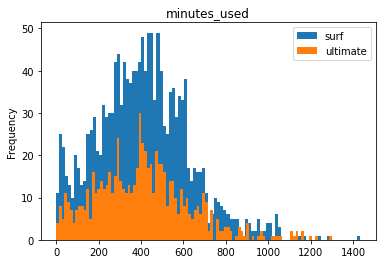

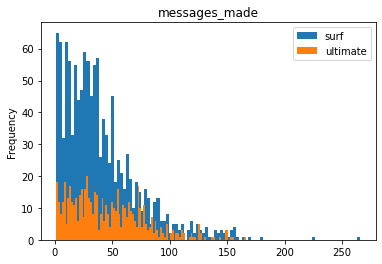

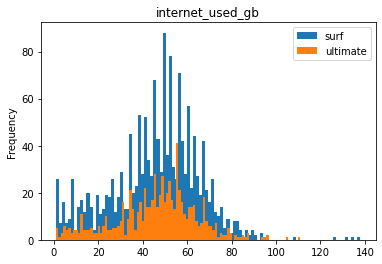

In [74]:
variables = ['minutes_used', 'messages_made', 'internet_used_gb']
plans = ['surf', 'ultimate']

for col in variables:
    for tariff in plans:
        usage_tabl_planos[usage_tabl_planos['plan'] == tariff][col].plot(kind = 'hist', bins = 100)
    plt.title(col)
    plt.legend(plans)
    plt.show()

####  Gráfico de minutos


   - O gráfico de minutos mostra uma distribuição normal, levemente assimétrica para a direita (positiva). 
     - Os 2 planos tem uma distribuição parecida
     - Usuários de surf tem uma maior concentração em torno da média, que tem um pico acentuado
     - Usuários de ultimate apresentam mais valores nos limite a direita 
     - No plano ultimate existem mais valores atípicos > 800 minutos.

####  Gráfico de mensagens:


   - Distribuição assimétrica positiva, para a direita, acentuada em surf.
     - Usuários de surf tem uma maior concentração dos dados entre 0 e 50 msgs, ja os de ultimate vai até 100 msg a distribuição que é um pouco maior. 
     

####  Gráfico de data:


   -  distribuição normal, levemente assimétrica para a esquerda (negativa), pouca densidade de frequência dos dados > de 80gb.
     - Ambos gráficos tem uma distribuição parecida
     - Usuários de surf tem uma maior concentração em torno da média, que tem um pico acentuado, grande concentração de densidade dos dados entre 40 e 70gb. 
     - Alguns outliers nos limites a direita

###  Analisando as chamadas 'calls'


In [75]:
tab_final_surf= usage_tabl_planos.query('plan == "surf"')

In [76]:
tab_final_prime= usage_tabl_planos.query('plan == "surf"')

In [77]:
tab_final_surf['minutes_used'].describe()

count    1545.000000
mean      411.974757
std       216.677329
min         0.000000
25%       262.000000
50%       406.000000
75%       546.000000
max      1433.000000
Name: minutes_used, dtype: float64

In [78]:
vari = np.var(tab_final_surf['minutes_used'])

In [79]:
standard_deviation = np.std(tab_final_surf['minutes_used'])
standard_deviation

216.6071952468525

In [80]:
tab_final_ultimate= usage_tabl_planos.query('plan == "ultimate"')

In [81]:
tab_final_ultimate['minutes_used'].describe()

count     713.000000
mean      410.103787
std       224.646615
min         0.000000
25%       248.000000
50%       401.000000
75%       536.000000
max      1297.000000
Name: minutes_used, dtype: float64

In [82]:
np.var(tab_final_ultimate['minutes_used'])

50395.32162661374

In [83]:
np.std(tab_final_ultimate['minutes_used'])


224.48902339894872

  - Ao se comparar o uso dos minutos para usuários de ambos planos, podemos observar que ultimate tem uma concentração mais elevada de valores acima de 400 minutos. Também esxiste uma distribuição maior de usuários nso limites superiores (de 800 a 1200)   
 - variação positiva a esquerda, o que coincide com um valor maior da variancia que do plano surf e um devio padrão mais elevado.   

###  Analisando o dataset messages


In [84]:
tab_final_surf['messages_made'].describe()

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: messages_made, dtype: float64

In [85]:
vari = np.var(tab_final_surf['messages_made'])

In [86]:
standard_deviation = np.std(tab_final_surf['messages_made'])
standard_deviation

33.02197981070137

ultimate

In [87]:
tab_final_ultimate['messages_made'].describe()

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: messages_made, dtype: float64

In [88]:
vari = np.var(tab_final_ultimate['messages_made'])

In [89]:
standard_deviation = np.std(tab_final_ultimate['messages_made'])
standard_deviation

32.91390158148425

   - Como a distribuição não é normal, é assimétrica com desvio padrão > à média .

###  Analisando o dataset data


   - desvio padrão < à média

In [90]:
tab_final_surf['internet_used_gb'].describe()

count    1558.000000
mean       45.947368
std        19.723127
min         1.000000
25%        35.000000
50%        48.000000
75%        59.000000
max       138.000000
Name: internet_used_gb, dtype: float64

In [91]:
 np.var(tab_final_surf['internet_used_gb'])

388.7520437808256

In [92]:
standard_deviation = np.std(tab_final_surf['internet_used_gb'])
standard_deviation

19.716795981619974

In [93]:
tab_final_ultimate['internet_used_gb'].describe()

count    719.000000
mean      46.229485
std       18.281120
min        1.000000
25%       36.000000
50%       49.000000
75%       58.000000
max      111.000000
Name: internet_used_gb, dtype: float64

In [94]:
 np.var(tab_final_ultimate['internet_used_gb'])

333.7345409034724

In [95]:
standard_deviation = np.std(tab_final_ultimate['internet_used_gb'])
standard_deviation

18.268402801106408

*Coincide com observado nos gráficos* 

In [96]:
ultim_user['mont_revenue'].plot.box()

NameError: name 'ultim_user' is not defined

In [ ]:
surf_users['mont_revenue'].plot.box()

Os valores dos quartis superiores de surf são maiores, além disso o valor da média também é superior.

##  Teste as hipóteses


     Os gráficos gerados permitiram observações interessantes, porém podemos buscar por outros tipos de "comportamento" dos usuários nos dados. 
  ### *Hipótese 1: - A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.*


A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.


In [106]:
usage_tabl_planos['ny_nj'] = usage_tabl_planos['city'].str.contains('NY-NJ')

In [107]:
usage_tabl_planos['ny_nj'].value_counts() 

False    1925
True      378
Name: ny_nj, dtype: int64

In [108]:
other_users = usage_tabl_planos.query('ny_nj == False')


In [109]:
nynj_users  = usage_tabl_planos.query('ny_nj == True')


In [110]:
import seaborn as sns


In [111]:
result= spt.ttest_ind(nynj_users['mont_revenue'], other_users['mont_revenue'], equal_var=False)

In [112]:
alpha= 5
print('p-value: ', result.pvalue)

if result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.008973347079608972
We reject the null hypothesis


  - *De acordo com o teste feito o valor de p-value é baixo (0.008) e nos permite rejeitar a hipótese nula. 
  Sendo assim a afirmativa de receita  dos usuários de NY-NJ ser diferente dos de outras regiões pode ser considerada verdadeira.* 

  ### *Hipótese 2: - receita média dos usuários dos planos Ultimate e Surf são diferentes.*


In [128]:
 usage_tabl_planos.head(1)

,user_id,plan,city,minutes_used,calls_made,messages_made,internet_used_gb,charg_calls,charg_text,charg_data,mont_revenue,ny_nj,revn_med_surf
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",117.0,16.0,11.0,5.0,0.0,0.0,2.0,84.0,False,False


In [129]:
usage_tabl_planos['revn_med_surf'] = usage_tabl_planos['plan'].str.contains('surf')

In [130]:
usage_tabl_planos['revn_med_surf'].value_counts()

True     1579
False     724
Name: revn_med_surf, dtype: int64

surf_users = usage_tabl_planos.query( 'plan == "surf"')


In [131]:
ultim_user = usage_tabl_planos.query('revn_med_surf == False')


In [132]:
surf_users = usage_tabl_planos.query( 'revn_med_surf == True')


In [133]:
result_plans= spt.ttest_ind(surf_users['mont_revenue'], ultim_user['mont_revenue'], equal_var=False)

In [134]:
alpha= 5
print('p-value: ', result_plans.pvalue)

if result_plans.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  5.101106521390077e-36
We reject the null hypothesis


In [135]:
result_plans

Ttest_indResult(statistic=12.774173965289636, pvalue=5.101106521390077e-36)

  - *De acordo com o teste feito o valor de p-value é baixo (0.008) e nos permite rejeitar a hipótese nula. Sendo assim a afirmativa de receita  dos usuários dos planos surf e ultimate serem diferentes pode ser considerada verdadeira.* 

In [136]:
surf_users['mont_revenue'].describe()

count    1579.000000
mean      460.263116
std       202.663015
min        20.000000
25%       345.060000
50%       485.000000
75%       595.000000
max      1388.210000
Name: mont_revenue, dtype: float64

In [137]:
ultim_user['mont_revenue'].describe()

count    724.000000
mean     370.584254
std      129.807283
min       70.000000
25%      294.000000
50%      385.000000
75%      449.750000
max      826.000000
Name: mont_revenue, dtype: float64

##  Conclusão


*De a cordo com os dados analisados sobre o comportamento dos usuários podes afirmar o seguinte:* 
      
   -  A receita média dos usuários de NY-NJ são diferentes dos das demais regiões.
   -  A receita média dos usuários dos planos surf e ultimate são diferentes.
   - O Plano 'surf' é o mais lucrativo ja que a média mensal dos usuários é maior (460), bem como o quartil superiro que representa uma maior concentração de usuário com uma renda mensal entre 600 a 1000. 